In [2]:
import xdem
import geoutils as gu
import pyproj
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dem = xdem.DEM("data/nasadem/merged_output.tif")
print(dem.get_terrain_attribute)  # коротка інформація
print(dem.info)  # детальна інформація про розмір, CRS, NoData, статистику


<bound method DEM.get_terrain_attribute of DEM(
  data=not_loaded; shape on disk (1, 7201, 10801); will load (7201, 10801)
  transform=| 0.00, 0.00, 24.00|
            | 0.00,-0.00, 49.00|
            | 0.00, 0.00, 1.00|
  crs=EPSG:4326
  nodata=None)>
<bound method Raster.info of DEM(
  data=not_loaded; shape on disk (1, 7201, 10801); will load (7201, 10801)
  transform=| 0.00, 0.00, 24.00|
            | 0.00,-0.00, 49.00|
            | 0.00, 0.00, 1.00|
  crs=EPSG:4326
  nodata=None)>


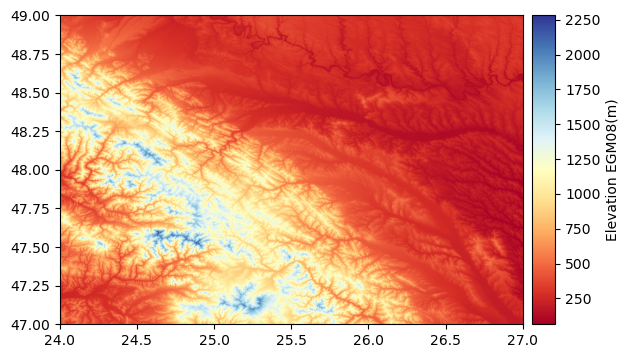

In [5]:
dem.plot(cmap="RdYlBu",  cbar_title="Elevation EGM08(m)")


In [9]:
dem = dem.astype('float32')  # Конвертуємо в float32
dem.data = np.where(dem.data == -32768, np.nan, dem.data)

In [11]:
dem.data = np.where(dem.data == -32768, -9999, dem.data)  # Використовуємо -9999 як значення NoData


In [12]:
print(dem.info)  # детальна інформація про розмір, CRS, NoData, статистику


<bound method Raster.info of DEM(
  data=[[425. 423. 421. ... 319. 321. 321.]
        [424. 423. 420. ... 320. 321. 321.]
        [423. 421. 420. ... 320. 320. 319.]
        ...
        [280. 274. 271. ... 242. 241. 239.]
        [286. 279. 275. ... 244. 243. 241.]
        [289. 284. 280. ... 246. 245. 242.]]
  transform=| 0.00, 0.00, 24.00|
            | 0.00,-0.00, 49.00|
            | 0.00, 0.00, 1.00|
  crs=EPSG:4326
  nodata=-99999)>


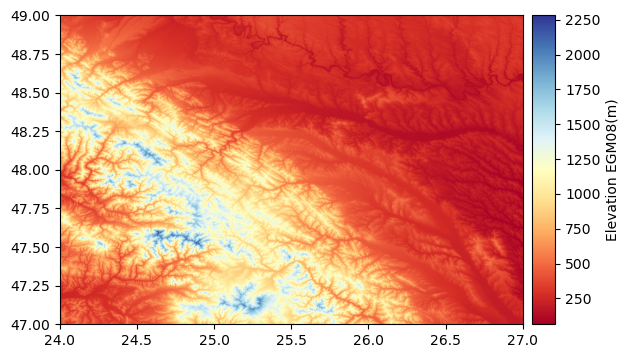

In [13]:
dem.plot(cmap="RdYlBu",  cbar_title="Elevation EGM08(m)")


In [16]:
dem.save('data/nasadem/nasa_dem.tif', nodata=-9999)

<bound method Raster.info of DEM(
  data=[[425. 423. 421. ... 319. 321. 321.]
        [424. 423. 420. ... 320. 321. 321.]
        [423. 421. 420. ... 320. 320. 319.]
        ...
        [280. 274. 271. ... 242. 241. 239.]
        [286. 279. 275. ... 244. 243. 241.]
        [289. 284. 280. ... 246. 245. 242.]]
  transform=| 0.00, 0.00, 24.00|
            | 0.00,-0.00, 49.00|
            | 0.00, 0.00, 1.00|
  crs=EPSG:4326
  nodata=-99999)>


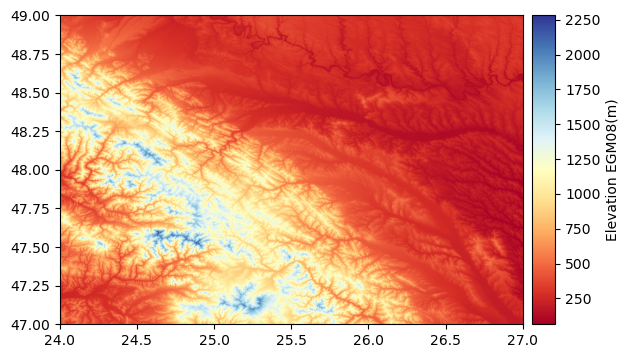

In [17]:
dem_nasa = xdem.DEM("data/nasadem/nasa_dem.tif")
dem_nasa.plot(cmap="RdYlBu",  cbar_title="Elevation EGM08(m)")
print(dem.info)


The NASADEM dataset, developed under NASA's MEaSUREs program and released in 2020, represents an updated and refined version of the original Shuttle Radar Topography Mission (SRTM) Digital Elevation Model (DEM).

It incorporates improvements such as enhanced geolocation accuracy using ICESat/GLAS ground control points, void-filling with auxiliary DEMs (ASTER GDEM and AW3D30), and conversion to the EGM96 geoid vertical reference.

Although distributed in the legacy HGT format for compatibility, NASADEM reflects a significant advancement in the quality and reliability of global DEMs at a 1 arc-second (~30 m) resolution.

 | Оригінальний SRTM | NASADEM
Рік | 2000 | 2020
Формат | HGT | HGT (оновлений)
Якість геолокації | Гірша | Значно покращена (завдяки ICESat GLAS)
Заповнення прогалин (void fill) | Частково | Повне заповнення (ASTER GDEM + AW3D30 DEM)
Система висот | WGS84 EGM96 геоїд | WGS84 EGM96 геоїд
Охоплення | 60°N - 56°S | те саме
Похибка | ~16 м RMSE | нижча (залежить від регіону, часто до 10–12 м RMSE)

# NASADEM Data Processing for Hydrological Modeling

### 1. Dataset Description and Conversion to GeoTIFF Format

For improved DEM data quality, we utilized the NASADEM dataset in our scientific work. The original `.hgt` format was converted to the GeoTIFF format for further use in modeling through the `gdal_translate` tool. The conversion was performed with spatial referencing and NoData values specified for missing data, which is standard for NASADEM.

```bash
# Command for conversion
gdal_translate -of GTiff -a_srs EPSG:4326 -a_nodata -32768 input.hgt output.tif



### **Ukrainian Version:**

```markdown
# Обробка даних NASADEM для гідрологічного моделювання

### 1. Опис даних та конвертація у формат GeoTIFF

Для покращення якості даних DEM ми використовували набір даних NASADEM у нашій науковій роботі. Оригінальний формат `.hgt` був конвертований у формат GeoTIFF для подальшого використання в моделюванні через інструмент `gdal_translate`. Конвертація виконувалась із зазначенням просторової прив'язки та значення NoData для відсутніх даних, що є стандартом для NASADEM.

```bash
# Команда для конвертації
gdal_translate -of GTiff -a_srs EPSG:4326 -a_nodata -32768 input.hgt output.tif


Here's the markdown content you requested for your scientific article in both English and Ukrainian:

### **English Version:**

```markdown
# NASADEM Data Processing for Hydrological Modeling

### 1. Dataset Description and Conversion to GeoTIFF Format

For improved DEM data quality, we utilized the NASADEM dataset in our scientific work. The original `.hgt` format was converted to the GeoTIFF format for further use in modeling through the `gdal_translate` tool. The conversion was performed with spatial referencing and NoData values specified for missing data, which is standard for NASADEM.

```bash
# Command for conversion
gdal_translate -of GTiff -a_srs EPSG:4326 -a_nodata -32768 input.hgt output.tif
```

- `-of GTiff`: Specifies the output format as GeoTIFF.
- `-a_srs EPSG:4326`: Defines the spatial reference system (WGS84).
- `-a_nodata -32768`: Sets the NoData value to `-32768`, which corresponds to missing or erroneous data in the NASADEM dataset.

### 2. Data Processing for Scientific Modeling

After conversion, the NASADEM tiles were mosaicked using the `gdalbuildvrt` tool to create a unified dataset. This was followed by resampling and applying appropriate hydrological models.

The following command was used to combine all individual `.tif` tiles into a single mosaic:

```bash
gdalbuildvrt -input_file_list list.txt merged.vrt
gdal_translate -of GTiff merged.vrt merged.tif
```

This approach allowed us to efficiently handle large datasets and perform hydrological modeling on the entire region of interest.

### 3. Additional Considerations

While working with NASADEM, it is crucial to account for the potential errors represented by `-32768`, which signify missing or incorrect data points. Therefore, the use of NoData values is essential for accurate modeling and analysis. Furthermore, applying spatial reference systems ensures consistency with global mapping standards.
```

### **Ukrainian Version:**

```markdown
# Обробка даних NASADEM для гідрологічного моделювання

### 1. Опис даних та конвертація у формат GeoTIFF

Для покращення якості даних DEM ми використовували набір даних NASADEM у нашій науковій роботі. Оригінальний формат `.hgt` був конвертований у формат GeoTIFF для подальшого використання в моделюванні через інструмент `gdal_translate`. Конвертація виконувалась із зазначенням просторової прив'язки та значення NoData для відсутніх даних, що є стандартом для NASADEM.

```bash
# Команда для конвертації
gdal_translate -of GTiff -a_srs EPSG:4326 -a_nodata -32768 input.hgt output.tif
```

- `-of GTiff`: Встановлює формат виводу як GeoTIFF.
- `-a_srs EPSG:4326`: Визначає просторову систему координат (WGS84).
- `-a_nodata -32768`: Встановлює значення NoData на `-32768`, що відповідає відсутнім або помилковим даним у наборі даних NASADEM.

### 2. Обробка даних для наукового моделювання

Після конвертації окремі тайли NASADEM були зібрані в одну мозаїку за допомогою інструмента `gdalbuildvrt`. Це дозволило створити єдиний набір даних для подальшого ресемплінгу та застосування відповідних гідрологічних моделей.

Для об'єднання всіх окремих файлів `.tif` у одну мозаїку було використано таку команду:

```bash
gdalbuildvrt -input_file_list list.txt merged.vrt
gdal_translate -of GTiff merged.vrt merged.tif
```

Цей підхід дозволив ефективно обробляти великі набори даних і проводити гідрологічне моделювання на всій території досліджуваного регіону.

### 3. Додаткові міркування

При роботі з NASADEM важливо враховувати можливі помилки, позначені через значення `-32768`, що вказують на відсутні або некоректні дані. Тому використання значень NoData є важливим для точності моделювання та аналізу. Крім того, застосування просторових систем координат гарантує узгодженість із глобальними картографічними стандартами.
```

This markdown content will help you structure your scientific article in a professional manner, using proper terminology and clear instructions for data processing.

If you need further modifications or additions, feel free to ask!